In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/jdli/transpec")

import matplotlib
from matplotlib import rcParams, rc
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import cmasher as cmr

cmap = cmr.dusk
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 15
rcParams['font.family'] = 'sans-serif'
%config InlineBackend.figure_format = "retina"


data_dir = "/data/jdli/gaia/"
rdf = pd.read_csv(data_dir+"APtransXP_1229_4lbs_err_55coefs.csv")
print(rdf.shape, rdf.columns)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(66701, 54) Index(['teff_cross', 'logg_cross', 'moh_cross', 'aom_cross', 'e_teff_cross',
       'e_logg_cross', 'e_moh_cross', 'e_aom_cross', 'source_id',
       'source_id_y', 'bp_coef', 'e_bp_coef', 'rp_coef', 'e_rp_coef',
       'GAIAEDR3_SOURCE_ID', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR',
       'GAIAEDR3_PARALLAX', 'GAIAEDR3_PARALLAX_ERROR',
       'GAIAEDR3_PHOT_G_MEAN_MAG', 'GAIAEDR3_PHOT_BP_MEAN_MAG',
       'GAIAEDR3_PHOT_RP_MEAN_MAG', 'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR',
       'M_H', 'M_H_ERR', 'ALPHA_M', 'ALPHA_M_ERR', 'W1mag', 'W2mag', 'W3mag',
       'W4mag', 'Jmag', 'Hmag', 'Kmag', 'e_W1mag', 'e_W2mag', 'qph_w1',
       'qph_w2', 'Qfl_J', 'Qfl_H', 'Qfl_K', 'snr_bp', 'snr_bp10', 'snr_bp55',
       'snr_rp', 'snr_rp10', 'snr_rp55'],
      dtype='object')


In [76]:
d_teff = 5

idx = np.abs(rdf['TEFF']-4500.)<d_teff

sdf = rdf[idx].reset_index()
print(len(sdf))

497


In [13]:
from gaiaxpy import convert


xp_spec, sampling = convert(list(sdf['source_id'].values))

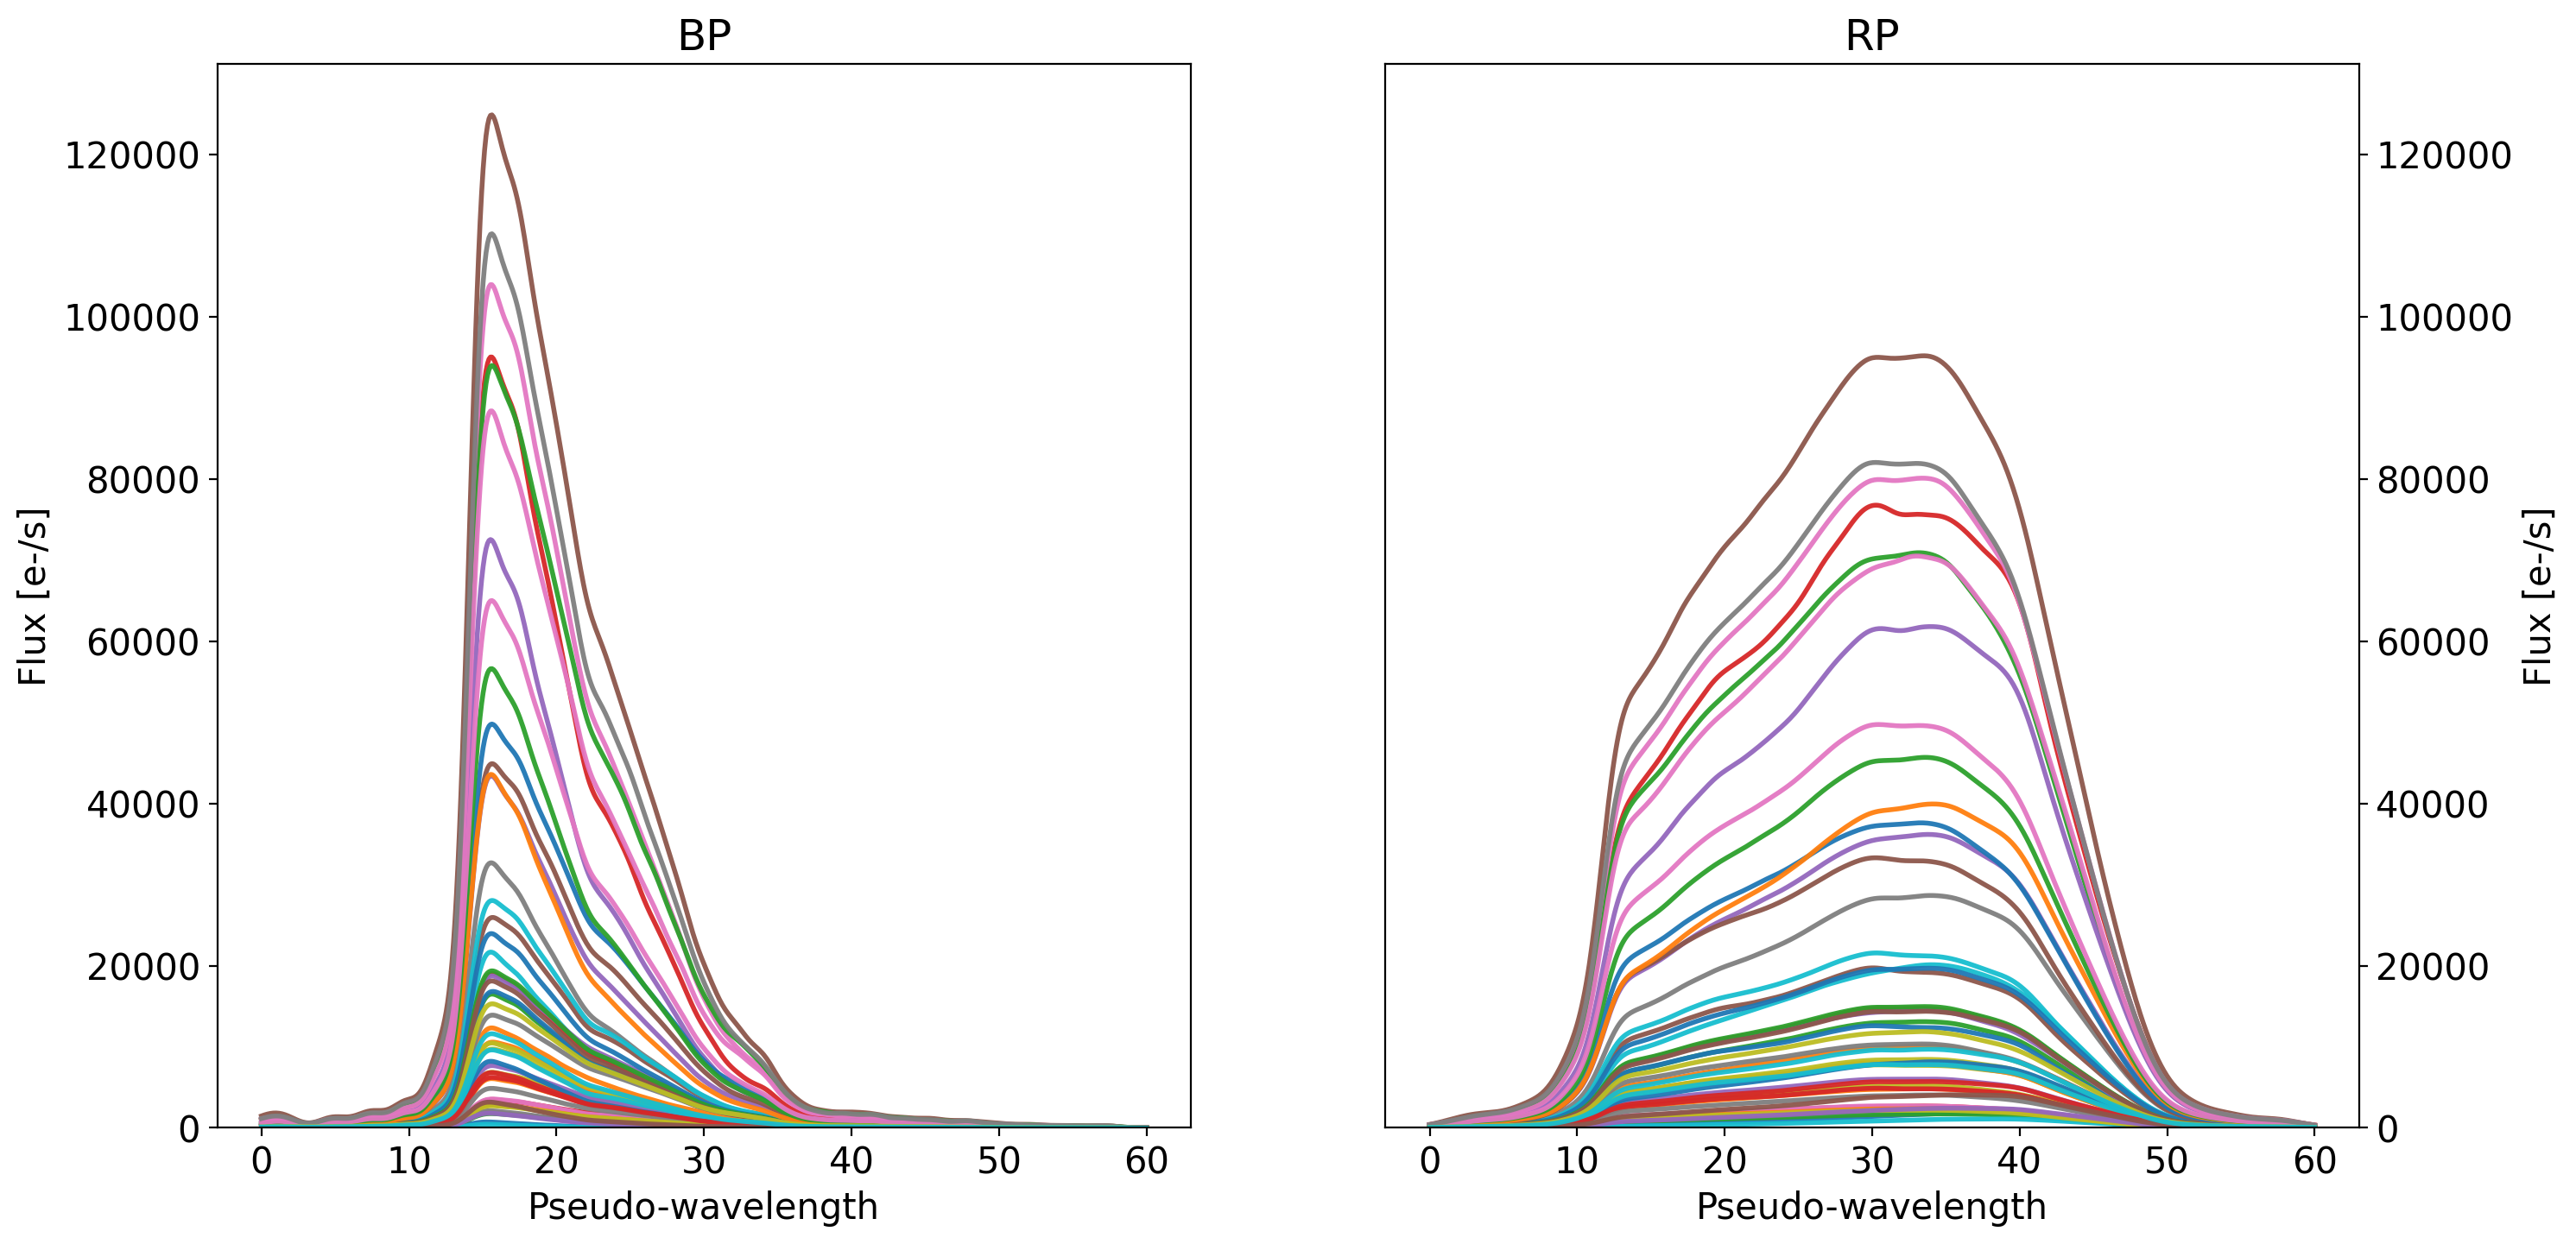

In [16]:
from gaiaxpy import plot_spectra
# multi allows the spectra to appear in the same canvas

plot_spectra(xp_spec.iloc[:100],
             sampling=sampling, multi=True, legend=False)

In [111]:

def min_max_norm(x):
    # y= (x.T - x.min(axis=1)) / (x.max(axis=1) - x.min(axis=1))
    x_lo, x_hi = np.percentile(x, 1, axis=1), np.percentile(x, 99, axis=1)
    y = (x.T - x_lo) / (x_hi - x_lo)
    return y.T


norm_andrae = 10**((15.-sdf['GAIAEDR3_PHOT_G_MEAN_MAG'].values)*0.4)

N_data = len(sdf)
bp_flux_norm = np.array([xp_spec[xp_spec['xp']=='BP']['flux'].to_numpy()[_]/norm_andrae[_] for _ in range(N_data)])
rp_flux_norm = np.array([xp_spec[xp_spec['xp']=='RP']['flux'].to_numpy()[_]/norm_andrae[_] for _ in range(N_data)])



bp_flux_norm = min_max_norm(bp_flux_norm)
rp_flux_norm = min_max_norm(rp_flux_norm)

# idx = np.abs(sdf['M_H']-0)<1e-3

# len(sdf[idx])

# idx_sunlk = int(sdf[idx].index.values)

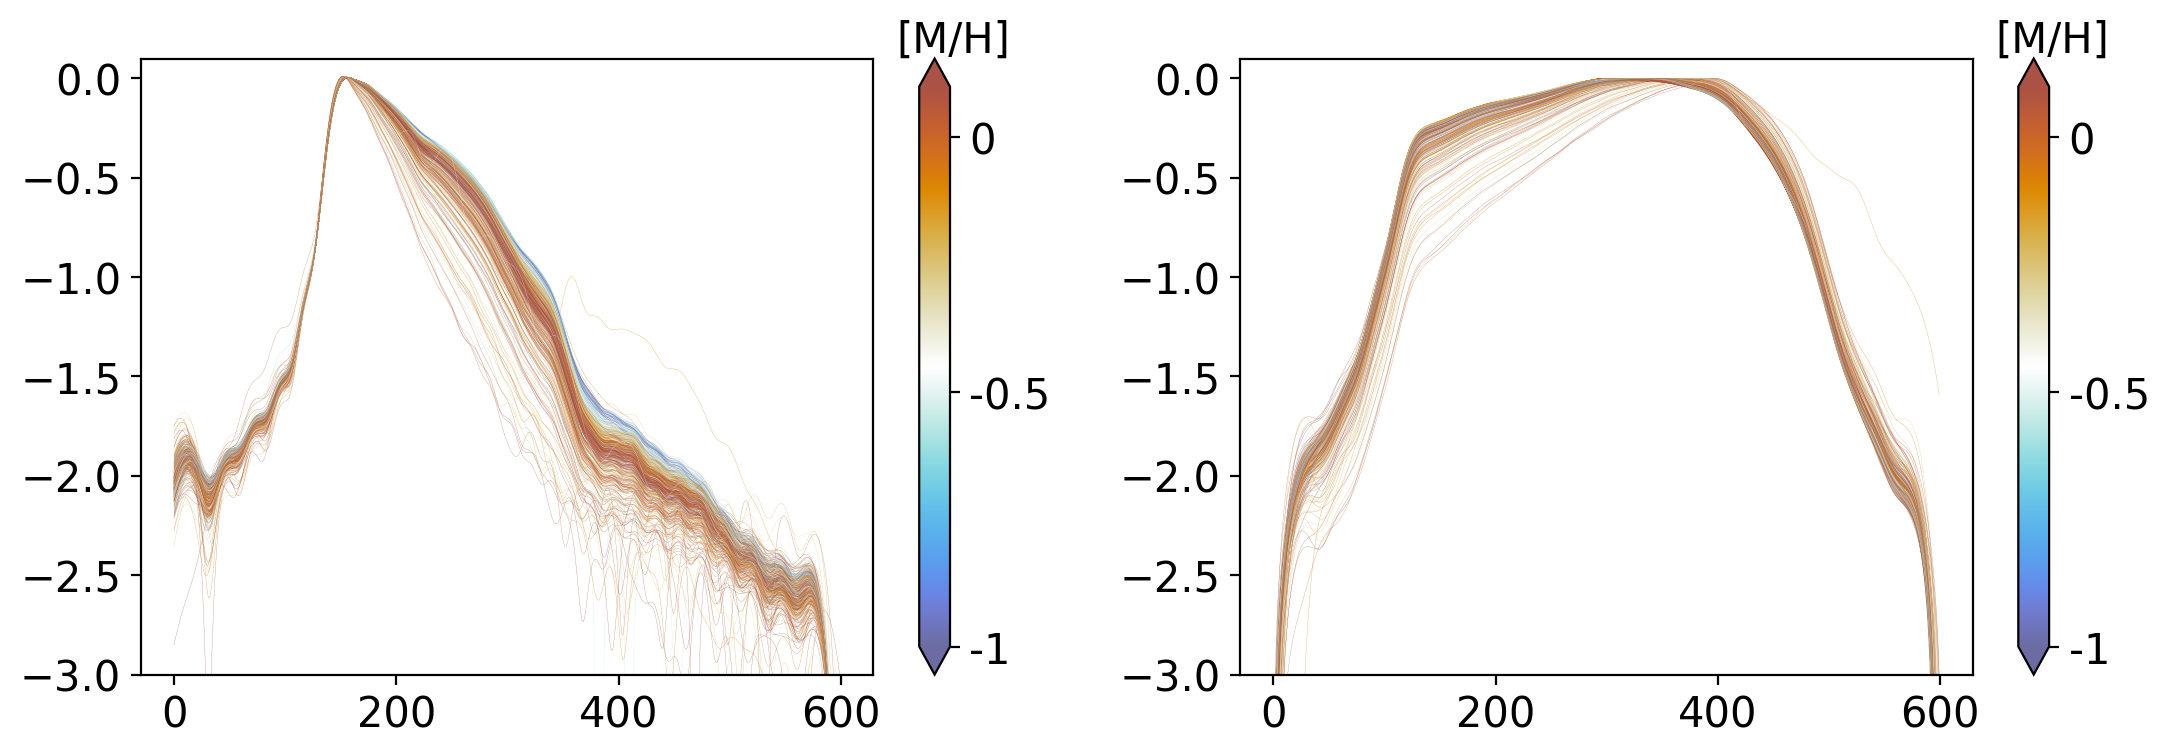

In [112]:
norm = colors.Normalize(vmin=-1, vmax=0.1)

cmap = cmr.prinsenvlag_r
colors_ = [cmap(norm(_)) for _ in sdf['M_H']]

fig, ax = plt.subplots(1,2, figsize=(13,4))

num_plot = bp_flux_norm.shape[0]

ax1, ax2 = ax.ravel()
# num_plot=10
for i in range(num_plot):
    ax1.plot(np.log10(bp_flux_norm[i]), c=colors_[i], lw=0.1, alpha=0.8)
    # ax.plot(np.log(np.abs(bp_flux_norm[i]-bp_flux_norm[idx_sunlk])), c=colors_[i], lw=1, alpha=0.5)
    ax2.plot(np.log10(rp_flux_norm[i]), c=colors_[i], lw=0.1, alpha=0.8)
    
    
for ax in ax.ravel():
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    clb1 = plt.colorbar(sm, ax=ax, ticks=[-1,-0.5,0], extend='both')
    clb1.ax.set_yticklabels([-1,-0.5,0]) 
    clb1.set_label(r"[M/H]", rotation=0, y=1.12, labelpad=-35)

    ax.set_ylim([-3,0.1]);
    


In [138]:
d_teff = 5
d_moh  = 0.2
moh_mid = -0.5

idx = ((np.abs(rdf['TEFF']-4500.)<d_teff)) & (np.abs(rdf['M_H']-moh_mid)<d_moh)

adf = rdf[idx].reset_index()
print(len(adf))

126


In [139]:
xp_spec, sampling = convert(list(adf['source_id'].values))


norm_andrae = 10**((15.-adf['GAIAEDR3_PHOT_G_MEAN_MAG'].values)*0.4)

N_data = len(adf)
bp_flux_norm = np.array([xp_spec[xp_spec['xp']=='BP']['flux'].to_numpy()[_]/norm_andrae[_] for _ in range(N_data)])
rp_flux_norm = np.array([xp_spec[xp_spec['xp']=='RP']['flux'].to_numpy()[_]/norm_andrae[_] for _ in range(N_data)])


bp_flux_norm = min_max_norm(bp_flux_norm)
rp_flux_norm = min_max_norm(rp_flux_norm)

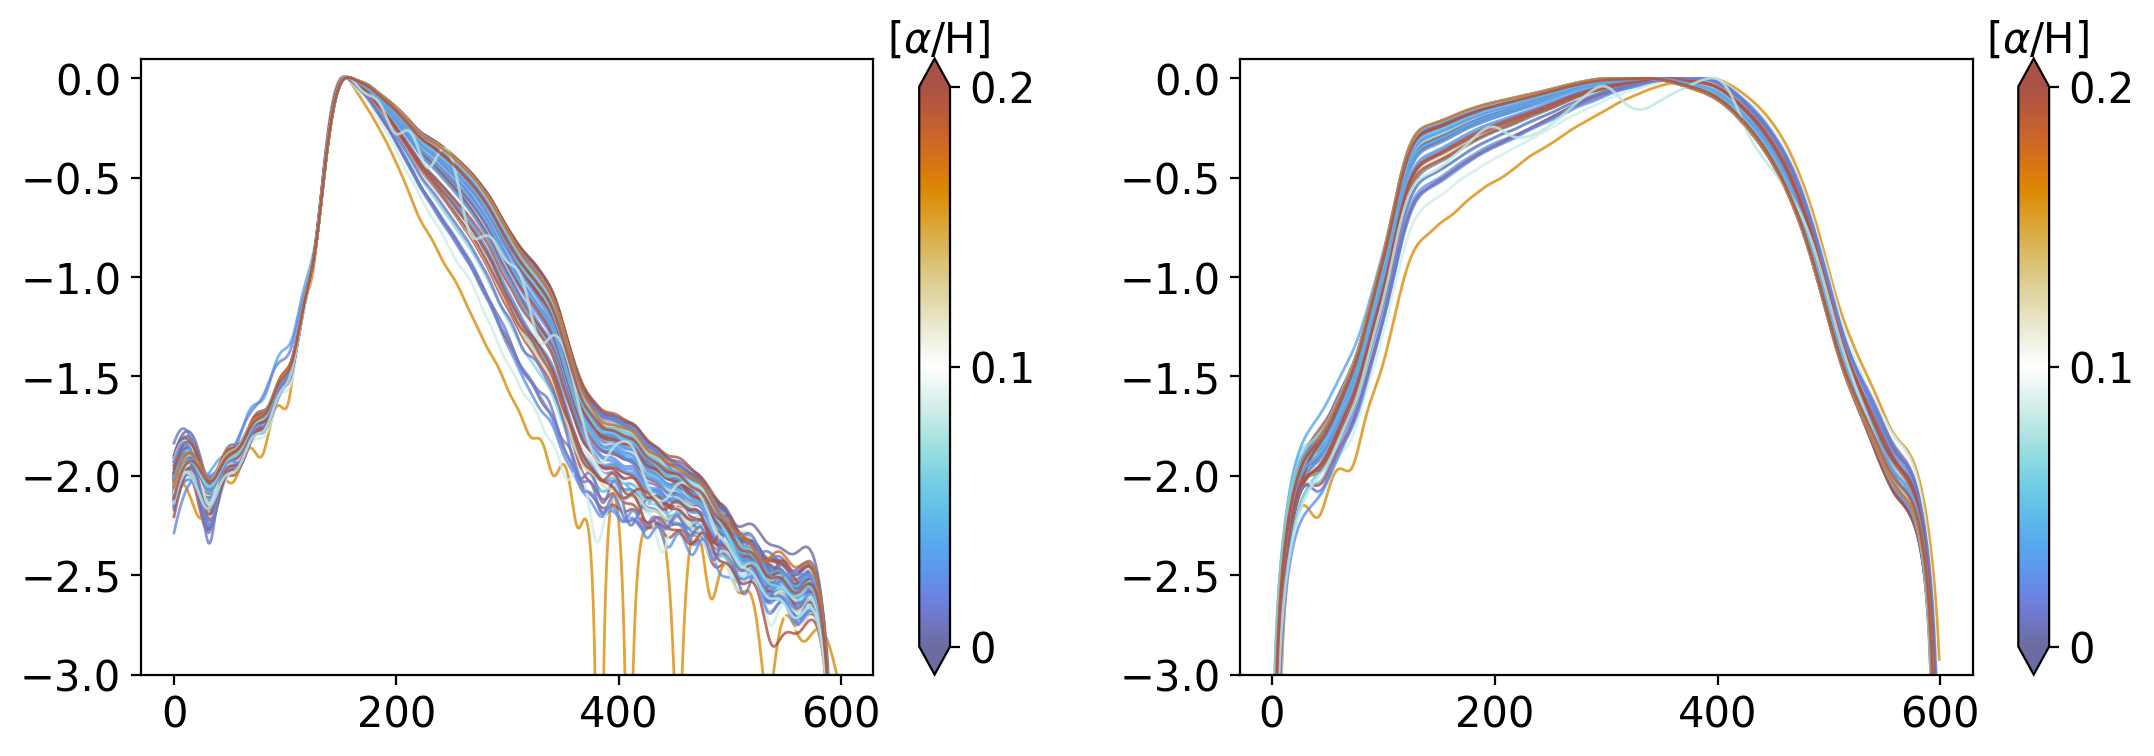

In [140]:
norm = colors.Normalize(vmin=0, vmax=0.2)
cmap = cmr.prinsenvlag_r

colors_ = [cmap(norm(_)) for _ in sdf['ALPHA_M']]

fig, ax = plt.subplots(1,2, figsize=(13,4))

num_plot = bp_flux_norm.shape[0]

ax1, ax2 = ax.ravel()
# num_plot=10
for i in range(num_plot):
    ax1.plot(np.log10(bp_flux_norm[i]), c=colors_[i], lw=1, alpha=0.8)
    ax2.plot(np.log10(rp_flux_norm[i]), c=colors_[i], lw=1, alpha=0.8)
    
    
for ax in ax.ravel():
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    clb1 = plt.colorbar(sm, ax=ax, ticks=[0,0.1,0.2,0.3], extend='both')
    clb1.ax.set_yticklabels([0,0.1,0.2,0.3]) 
    clb1.set_label(r"[$\alpha$/H]", rotation=0, y=1.12, labelpad=-35)
    ax.set_ylim([-3,0.1]);
    
